In [1]:
import numpy as np
import matplotlib.pyplot as plt

xn=np.array([0, 1, 2, 3, 4, 5, 6])

yn=np.array([ 4.2, 1.4, 0, -0.4, -0.1, 1.6, 4.1])


n=len(xn)

Sum_x=sum(xn)
Sum_y=sum(yn)
Sum_xx=sum(xn**2)
Sum_xy=sum(xn*yn)
Sum_xx=sum(xn**2)
Sum_xxx=sum(xn**3)
Sum_xxxx=sum(xn**4)
Sum_xxy=sum((xn**2)*yn)

print(Sum_x, Sum_y, Sum_xx, Sum_xxx, Sum_xxxx, Sum_xy, Sum_xxy)

21 10.799999999999999 91 441 2275 32.4 183.8


In [2]:
import copy

def imprimirSistema(a, b, etiqueta):
    n = len(b)
    print(etiqueta)
    for i in range(n):
        for j in range(n):
            print(a[i][j], end = " ")
        print("|", b[i])
    print()

def intercambiarFilas(a, i, j):
    temp = a[i]
    a[i] = a[j]
    a[j] = temp

def gaussJordan(ao, bo):
    a = copy.deepcopy(ao)
    b = copy.copy(bo)

    n = len(b)
    imprimirSistema(a, b, "Matriz inicial")
    for i in range(n):
        if a[i][i] == 0:
            # Si el pivote es cero, buscar una fila que tenga un elemento no nulo en la misma columna
            for j in range(i+1, n):
                if a[j][i] != 0:
                    intercambiarFilas(a, i, j)
                    intercambiarFilas(b, i, j)
                    break
            imprimirSistema(a, b, "PIVOTEO")
        pivote = a[i][i]
        # Dividir por el pivote
        for j in range(n):
            a[i][j] /= pivote
        b[i] /= pivote
        imprimirSistema(a, b, "División")
        for k in range(n):
            if i != k:
                #Se reduce
                valorAux = -a[k][i]
                for j in range(n):
                    a[k][j] += a[i][j] * valorAux
                b[k] += b[i] * valorAux
        imprimirSistema(a, b, "Reducción")
    
    return b

a = [[n, Sum_x, Sum_xx ], [Sum_x, Sum_xx, Sum_xxx], [Sum_xx, Sum_xxx, Sum_xxxx]]
b = [Sum_y, Sum_xy, Sum_xxy]
x = gaussJordan(a, b)

print("Respuesta:")
for i in range(len(x)):
    print("x" + str(i+1), "=", x[i])

a0=x[0]
a1=x[1]
a2=x[2]

Matriz inicial
7 21 91 | 10.799999999999999
21 91 441 | 32.4
91 441 2275 | 183.8

División
1.0 3.0 13.0 | 1.5428571428571427
21 91 441 | 32.4
91 441 2275 | 183.8

Reducción
1.0 3.0 13.0 | 1.5428571428571427
0.0 28.0 168.0 | 0.0
0.0 168.0 1092.0 | 43.400000000000034

División
1.0 3.0 13.0 | 1.5428571428571427
0.0 1.0 6.0 | 0.0
0.0 168.0 1092.0 | 43.400000000000034

Reducción
1.0 0.0 -5.0 | 1.5428571428571427
0.0 1.0 6.0 | 0.0
0.0 0.0 84.0 | 43.400000000000034

División
1.0 0.0 -5.0 | 1.5428571428571427
0.0 1.0 6.0 | 0.0
0.0 0.0 1.0 | 0.516666666666667

Reducción
1.0 0.0 0.0 | 4.126190476190478
0.0 1.0 0.0 | -3.1000000000000023
0.0 0.0 1.0 | 0.516666666666667

Respuesta:
x1 = 4.126190476190478
x2 = -3.1000000000000023
x3 = 0.516666666666667


22.477142857142855
0.05380952380952364
22.423333333333332


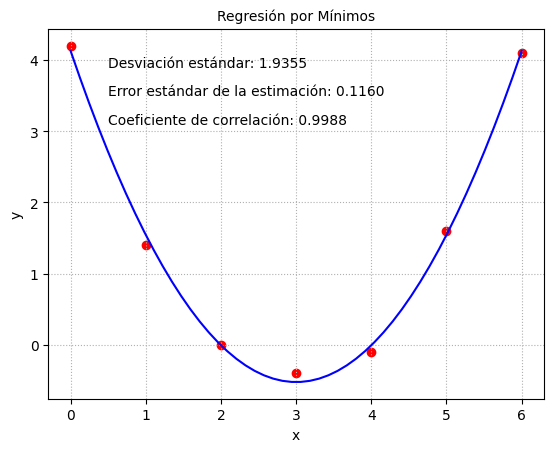

In [7]:
from mpl_toolkits.mplot3d.axes3d import math

St = 0
Sr = 0
for i in range(n):
  St += (yn[i] - Sum_y/n)**2
  aux = (yn[i] - a0 - (a1 * xn[i]) - (a2 * (xn[i]**2)))**2
  Sr += aux
print(St)
print(Sr)

std_dev = math.sqrt(St/6)

std_error = math.sqrt(Sr/4)

r=St-Sr
print(r)

correlation_coef = math.sqrt(r/St)

x=np.linspace(0, 6)
y= a0 +a1*x+a2*(x**2)

plt.figure(1)

plt.scatter(xn, yn, color='r')
plt.grid(linestyle='dotted')
plt.plot(x, y, color='b')

plt.title(r'Regresión por Mínimos', fontsize=10)
plt.xlabel(r'x', fontsize=10)
plt.ylabel(r'y', fontsize=10)

plt.text(0.5, 3.9, f'Desviación estándar: {std_dev:.4f}')
plt.text(0.5, 3.5, f'Error estándar de la estimación: {std_error:.4f}')
plt.text(0.5, 3.1, f'Coeficiente de correlación: {correlation_coef:.4f}')

plt.show()